# This code is to get the labeled_energy_data csv file of each model

## 对数据进行分析,展示出来的内容包括:
### 1. 每个模型在 5 个 epochs 下的每个能耗数据点

## Import the lib

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from Functions.PlotAnalysis import *
from matplotlib import rcParams

## Function in use

### preset the color and marker

In [3]:
# Create a color map and marker map for the steps
step_colors = {
    'idle': 'gray',
    'to_device': 'blue',
    'forward': 'green',
    'loss': 'red',
    'backward': 'purple',
    'optimize': 'orange'
}
step_markers = {
    'idle': 'o',
    'to_device': 's',
    'forward': '^',
    'loss': 'D',
    'backward': 'x',
    'optimize': 'P'
}

### plot with different model

In [4]:
def plot_model(modelname, model_data_folder_list, plot_folder):

    model_data_path = [model_data_folder_list[i] for i in range(len(model_data_folder_list)) if f'{modelname}' in model_data_folder_list[i]][0]
    energy_data, labeled_energy_data, to_device, forward, loss, backward, optimize, \
    to_device_energy, forward_energy, loss_energy, backward_energy, optimize_energy = load_data(model_data_path)

    plot_energy_data(labeled_energy_data, step_colors, step_markers, modelname, plot_folder)
    plot_period_energy_data(labeled_energy_data, step_colors, modelname, plot_folder)
    plot_batch_step_energy(to_device_energy, forward_energy, 
                           loss_energy, backward_energy, 
                           optimize_energy, step_colors, modelname, plot_folder)
    plot_step_energy_distribution(to_device_energy, forward_energy, 
                                  loss_energy, backward_energy, 
                                  optimize_energy, step_colors, modelname, plot_folder)
    plot_step_energy_distribution_bar(to_device_energy, forward_energy, 
                                      loss_energy, backward_energy, 
                                      optimize_energy, modelname, plot_folder)
    energy_batch_mean, energy_batch_std = plot_epoch_step_energy(to_device_energy, forward_energy, 
                                                                 loss_energy, backward_energy, 
                                                                 optimize_energy, step_colors, modelname, plot_folder)
    plot_epoch_step_time(to_device_energy, forward_energy, 
                         loss_energy, backward_energy, 
                         optimize_energy, step_colors, modelname, plot_folder)
    plot_step_time_distribution(to_device_energy, forward_energy, 
                                loss_energy, backward_energy, 
                                optimize_energy, step_colors, modelname, plot_folder)
    plot_step_time_distribution_box(to_device_energy, forward_energy, 
                                    loss_energy, backward_energy, 
                                    optimize_energy,step_colors, step_markers, modelname, plot_folder)

    return energy_batch_mean, energy_batch_std      # return the mean and std of the energy consumption of each step in each batch

    

## find the data path

In [ ]:
current_path = os.getcwd()
data_path = os.path.join(current_path, 'CNNModelsData')
data_folders = os.listdir(data_path)
print(data_folders)

# # create a forlder to save the plots
# plots_name = ['Plots_fashion_mnist', 'Plots_cifar100']
# # plot_folder = os.path.join(current_path, plots_name[0])
# plot_folder = os.path.join(current_path, plots_name[1])
# print(f'The plot folder is {plot_folder}')
# if not os.path.exists(plot_folder):
#     os.makedirs(plot_folder)

['googlenet_origin', 'resnet50', 'resnet34', 'mobilenetv2', 'vgg13', 'googlenet_mod7', 'googlenet_mod9', 'googlenet_mod8', 'googlenet_mod1', 'googlenet_mod6', 'resnet18', 'mobilenetv1', 'vit', 'vgg16', 'vgg11', 'vgg19', 'googlenet_mod3', 'googlenet_mod4', 'googlenet_mod5', 'googlenet_mod2', 'alexnet']
The plot folder is /Users/dtjgp/Projects/GreenAI/3080/Plots_cifar100


## load all the model data

In [6]:
# set the epoch number, batch size and the round number as well as the sampling rate
epoch = 5
batch_size = 128
round_num = 0
sampling_rate = 2

In [7]:
# for all the folder names in the data folder, generate the path to the folder
# and print the path
folder_name = f'E{epoch}_B{batch_size}_R{round_num}_SR{sampling_rate}'
print(folder_name)

# data_dir = 'fashion_mnist'
data_dir = 'cifar100'
model_data_folder_list = []
for folder in data_folders:
    folder_path = os.path.join(data_path, folder)
    folder_path = os.path.join(folder_path, data_dir)
    folder_path = os.path.join(folder_path, folder_name)
    
    print(folder_path)
    model_data_folder_list.append(folder_path)

print(model_data_folder_list)

E5_B128_R0_SR2
/Users/dtjgp/Projects/GreenAI/3080/CNNModelsData/googlenet_origin/cifar100/E5_B128_R0_SR2
/Users/dtjgp/Projects/GreenAI/3080/CNNModelsData/resnet50/cifar100/E5_B128_R0_SR2
/Users/dtjgp/Projects/GreenAI/3080/CNNModelsData/resnet34/cifar100/E5_B128_R0_SR2
/Users/dtjgp/Projects/GreenAI/3080/CNNModelsData/mobilenetv2/cifar100/E5_B128_R0_SR2
/Users/dtjgp/Projects/GreenAI/3080/CNNModelsData/vgg13/cifar100/E5_B128_R0_SR2
/Users/dtjgp/Projects/GreenAI/3080/CNNModelsData/googlenet_mod7/cifar100/E5_B128_R0_SR2
/Users/dtjgp/Projects/GreenAI/3080/CNNModelsData/googlenet_mod9/cifar100/E5_B128_R0_SR2
/Users/dtjgp/Projects/GreenAI/3080/CNNModelsData/googlenet_mod8/cifar100/E5_B128_R0_SR2
/Users/dtjgp/Projects/GreenAI/3080/CNNModelsData/googlenet_mod1/cifar100/E5_B128_R0_SR2
/Users/dtjgp/Projects/GreenAI/3080/CNNModelsData/googlenet_mod6/cifar100/E5_B128_R0_SR2
/Users/dtjgp/Projects/GreenAI/3080/CNNModelsData/resnet18/cifar100/E5_B128_R0_SR2
/Users/dtjgp/Projects/GreenAI/3080/CNNModelsD

## plot all the models

In [8]:
# # create a dictionary to store the energy consumption mean and std data for each model
# energy_data_models = {}
# for model in data_folders:
#     if model == '.DS_Store':
#         continue
#     print(f'The current model is {model}')
#     energy_batch_mean, energy_batch_std = plot_model(model, model_data_folder_list, plot_folder)
#     energy_data_models[model] = [energy_batch_mean, energy_batch_std]

In [9]:
# print(energy_data_models)

In [24]:
# Create a new dictionary excluding models containing 'mobilenet' in their name
energy_data_models = {
    model: data
    for model, data in energy_data_models.items()
    if 'mobilenet' not in model
}

# Optional: Print the dictionary to verify the removal (for debugging)
# print("Updated energy_data_models after removing mobilenet entries:")
# print(energy_data_models)


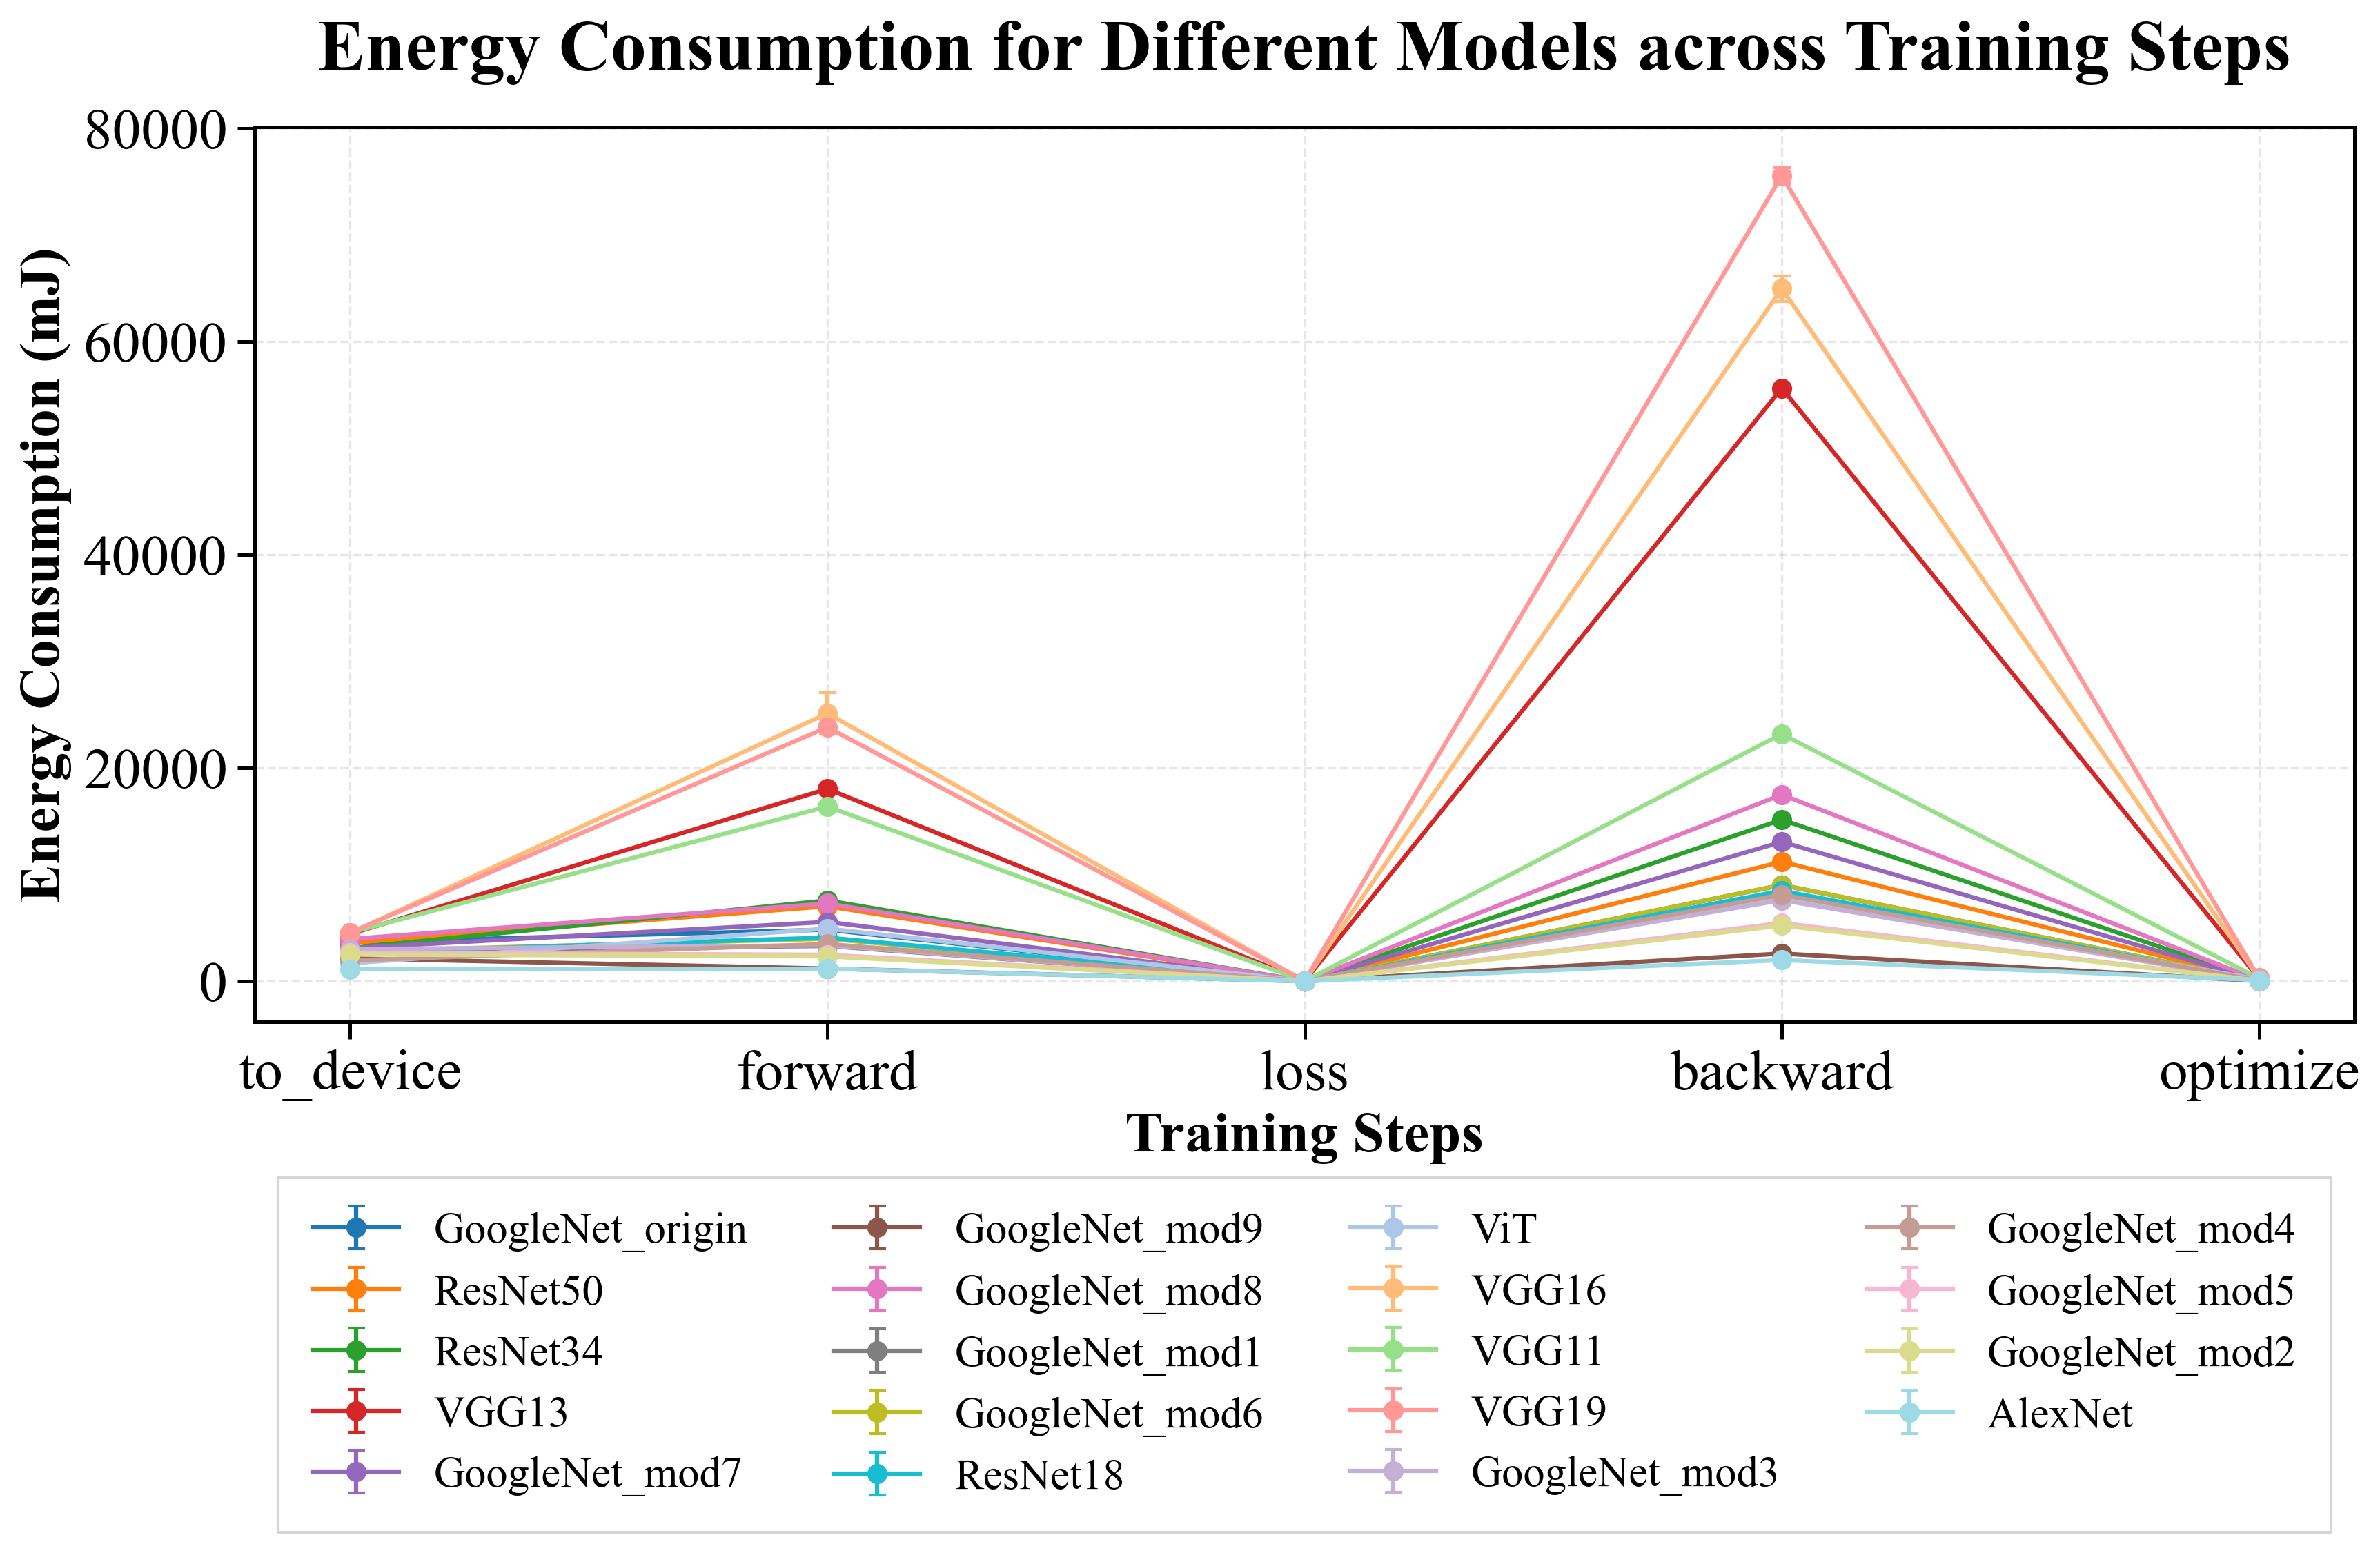

In [31]:
plt.rcParams.update({
    'font.family': 'serif',        # IEEE推荐衬线字体
    'font.serif': 'Times New Roman',
    'font.size': 14,               
    'axes.labelsize': 20,          # 坐标轴标签
    'axes.titlesize': 25,          # 标题
    'xtick.labelsize': 20,         
    'ytick.labelsize': 20,         
    'legend.fontsize': 15,         
    'legend.framealpha': 0.8,      
    'axes.linewidth': 1.2,         
    'lines.linewidth': 1.8,        
    'lines.markersize': 9,         
    'xtick.major.size': 6,         
    'xtick.major.width': 1.2,      
    'ytick.major.size': 6,         
    'ytick.major.width': 1.2,     
    'figure.dpi': 300              # 高分辨率
})

# Create a more distinct color palette suitable for publication
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', 
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
          '#aec7e8', '#ffbb78', '#98df8a', '#ff9896', '#c5b0d5',
          '#c49c94', '#f7b6d2', '#dbdb8d', '#9edae5', '#393b79']

plt.figure(figsize=(12, 8))
rcParams['pdf.fonttype'] = 42
rcParams['ps.fonttype'] = 42
x_axis = ['to_device', 'forward', 'loss', 'backward', 'optimize']

for (model, energy_data), color in zip(energy_data_models.items(), colors):
    energy_batch_mean = energy_data[0]
    energy_batch_std = energy_data[1]
    # Create display label with proper capitalization
    display_label = model
    display_label = display_label.replace('alexnet', 'AlexNet')
    display_label = display_label.replace('googlenet', 'GoogleNet') 
    display_label = display_label.replace('resnet', 'ResNet')
    display_label = display_label.replace('vgg', 'VGG')
    display_label = display_label.replace('vit', "ViT")
    
    plt.errorbar(x_axis, energy_batch_mean, yerr=energy_batch_std, 
                label=display_label, marker='o', color=color, 
                capsize=3, capthick=1, markersize=6, 
                linewidth=1.5)

plt.grid(True, linestyle='--', alpha=0.3)
plt.xlabel('Training Steps', fontweight='bold')
plt.ylabel('Energy Consumption (mJ)',  fontweight='bold')
plt.title('Energy Consumption for Different Models across Training Steps', 
           pad=20, fontweight='bold')
legend = plt.legend(
    loc='upper center',
    bbox_to_anchor=(0.5, -0.15),  # 图表下方布局
    ncol=4,
    frameon=True,
    fancybox=False,
    shadow=False,
    borderpad=0.8
)
plt.xticks(rotation=0)
plt.yticks()
plt.tight_layout()
# save the plot to pdf
# plt.savefig(os.path.join(plot_folder, 'energy_consumption_of_all_models.pdf'), 
#            dpi=300, bbox_inches='tight')
plt.savefig('energy_consumption_of_all_models_revise.pdf', 
           dpi=300, bbox_inches='tight')
plt.show()


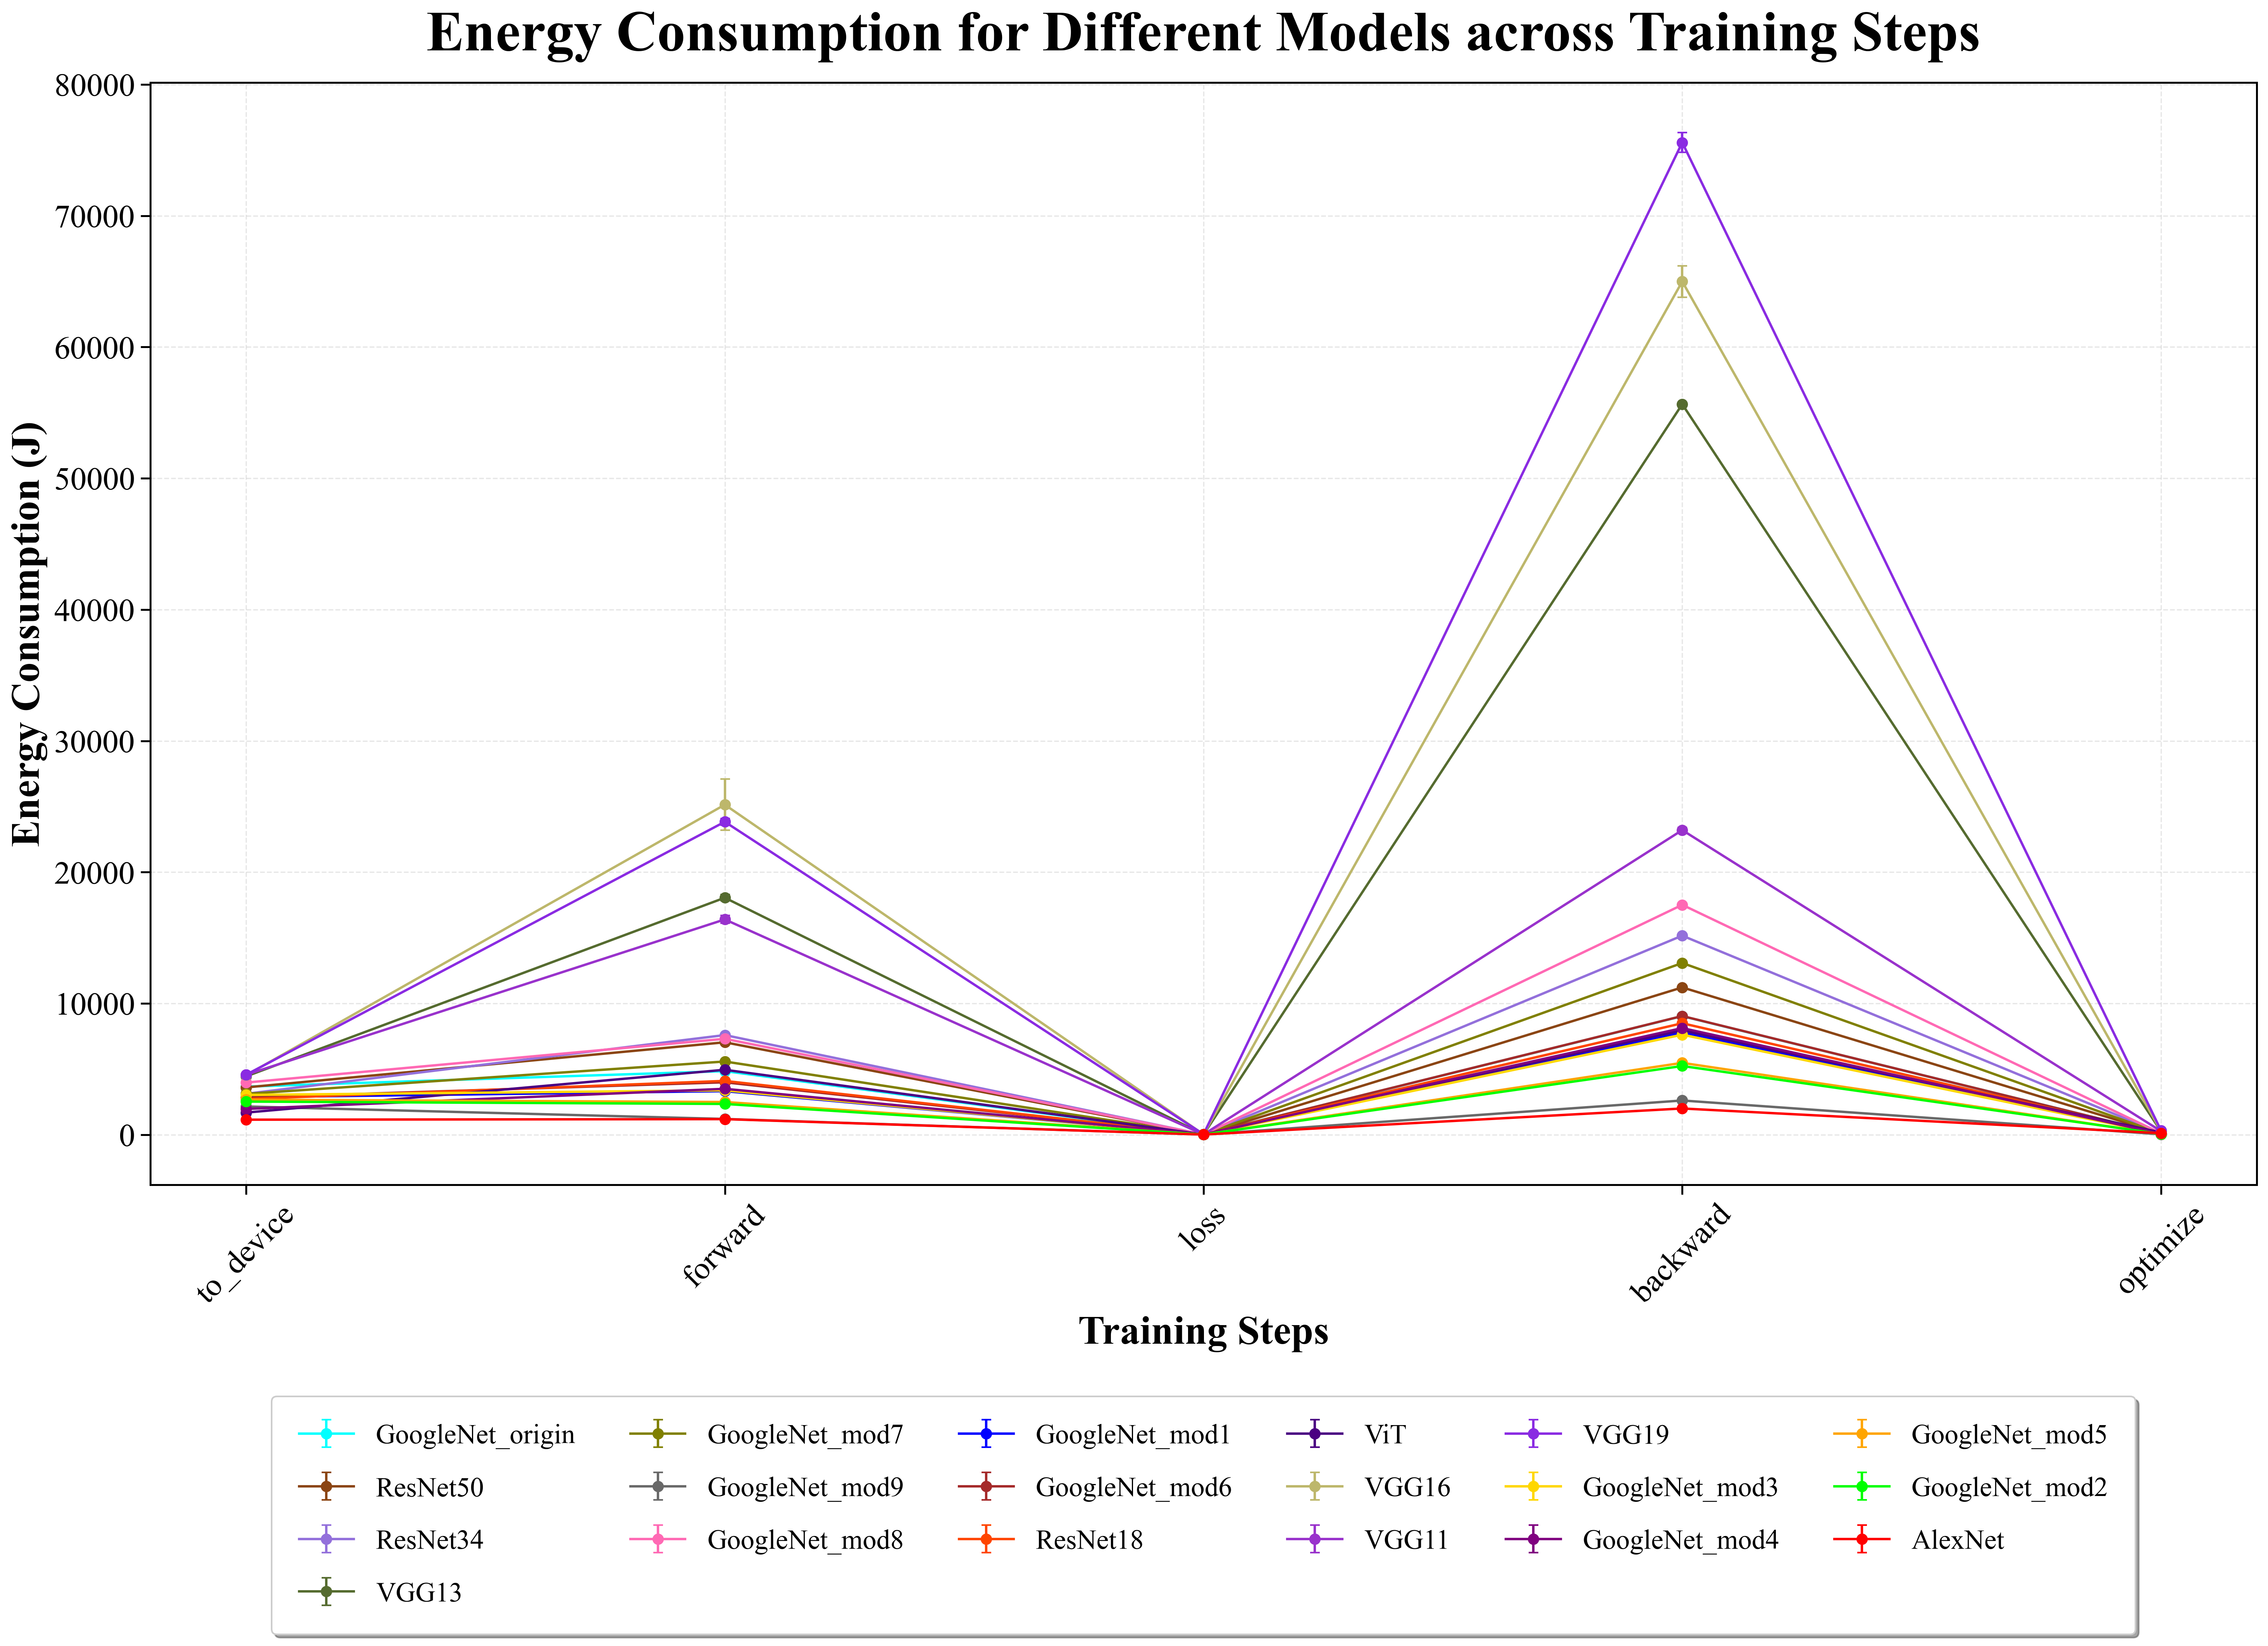

In [26]:
# Define colors for each model
model_colors = {
    'alexnet': '#FF0000',           # Red
    'googlenet_origin': '#00FFFF',  # Cyan
    'googlenet_mod1': '#0000FF',    # Blue
    'googlenet_mod2': '#00FF00',    # Green
    'googlenet_mod3': '#FFD700',    # Gold
    'googlenet_mod4': '#800080',    # Purple
    'googlenet_mod5': '#FFA500',    # Orange
    'googlenet_mod6': '#A52A2A',    # Brown
    'googlenet_mod7': '#808000',    # Olive
    'googlenet_mod8': '#FF69B4',    # Hot Pink
    'googlenet_mod9': '#696969',    # Dim Gray
    'resnet18': '#FF4500',          # Orange Red
    'resnet34': '#9370DB',          # Medium Purple
    'mobilenetv2': '#FF1493',       # Deep Pink
    'mobilenetv1': '#A9A9A9',       # Dark Gray
    'resnet50': '#8B4513',          # Saddle Brown
    'vgg13': '#556B2F',             # Dark Olive Green
    'vgg16': '#BDB76B',             # Dark Khaki
    'vit': '#4B0082',              # Indigo
    'vgg19': '#8A2BE2',            # Blue Violet
    'vgg11': '#9932CC'             # Dark Orchid
}
plt.figure(figsize=(20, 15), dpi=300)  # Added high DPI setting
x_axis = ['to_device', 'forward', 'loss', 'backward', 'optimize']

# Plot all models including VGG13 and VGG16
for model, energy_data in energy_data_models.items():
    energy_batch_mean = energy_data[0]
    energy_batch_std = energy_data[1]
    # Create display label with proper capitalization
    display_label = model
    display_label = display_label.replace('alexnet', 'AlexNet')
    display_label = display_label.replace('googlenet', 'GoogleNet') 
    display_label = display_label.replace('resnet', 'ResNet')
    display_label = display_label.replace('vgg', 'VGG')
    display_label = display_label.replace('vit', "ViT")
    
    plt.errorbar(x_axis, energy_batch_mean, yerr=energy_batch_std,
                label=display_label, marker='o', color=model_colors[model],
                capsize=3, capthick=1, markersize=6,
                linewidth=1.5)

plt.grid(True, linestyle='--', alpha=0.3)
plt.xlabel('Training Steps', fontsize=25, weight='bold')
plt.ylabel('Energy Consumption (J)', fontsize=25, weight='bold')
plt.title('Energy Consumption for Different Models across Training Steps', pad=20, fontsize=35, weight='bold')
plt.legend(loc='center', bbox_to_anchor=(0.5, -0.3),
          frameon=True, fancybox=True, shadow=True, 
          borderpad=1, labelspacing=1, ncol=6, prop={'family': 'serif', 'size': 17})
plt.xticks(rotation=45)
plt.tight_layout()
# save the plot to pdf file
plt.savefig(os.path.join(plot_folder, 'energy_consumption_of_all_models.pdf'))
plt.show()

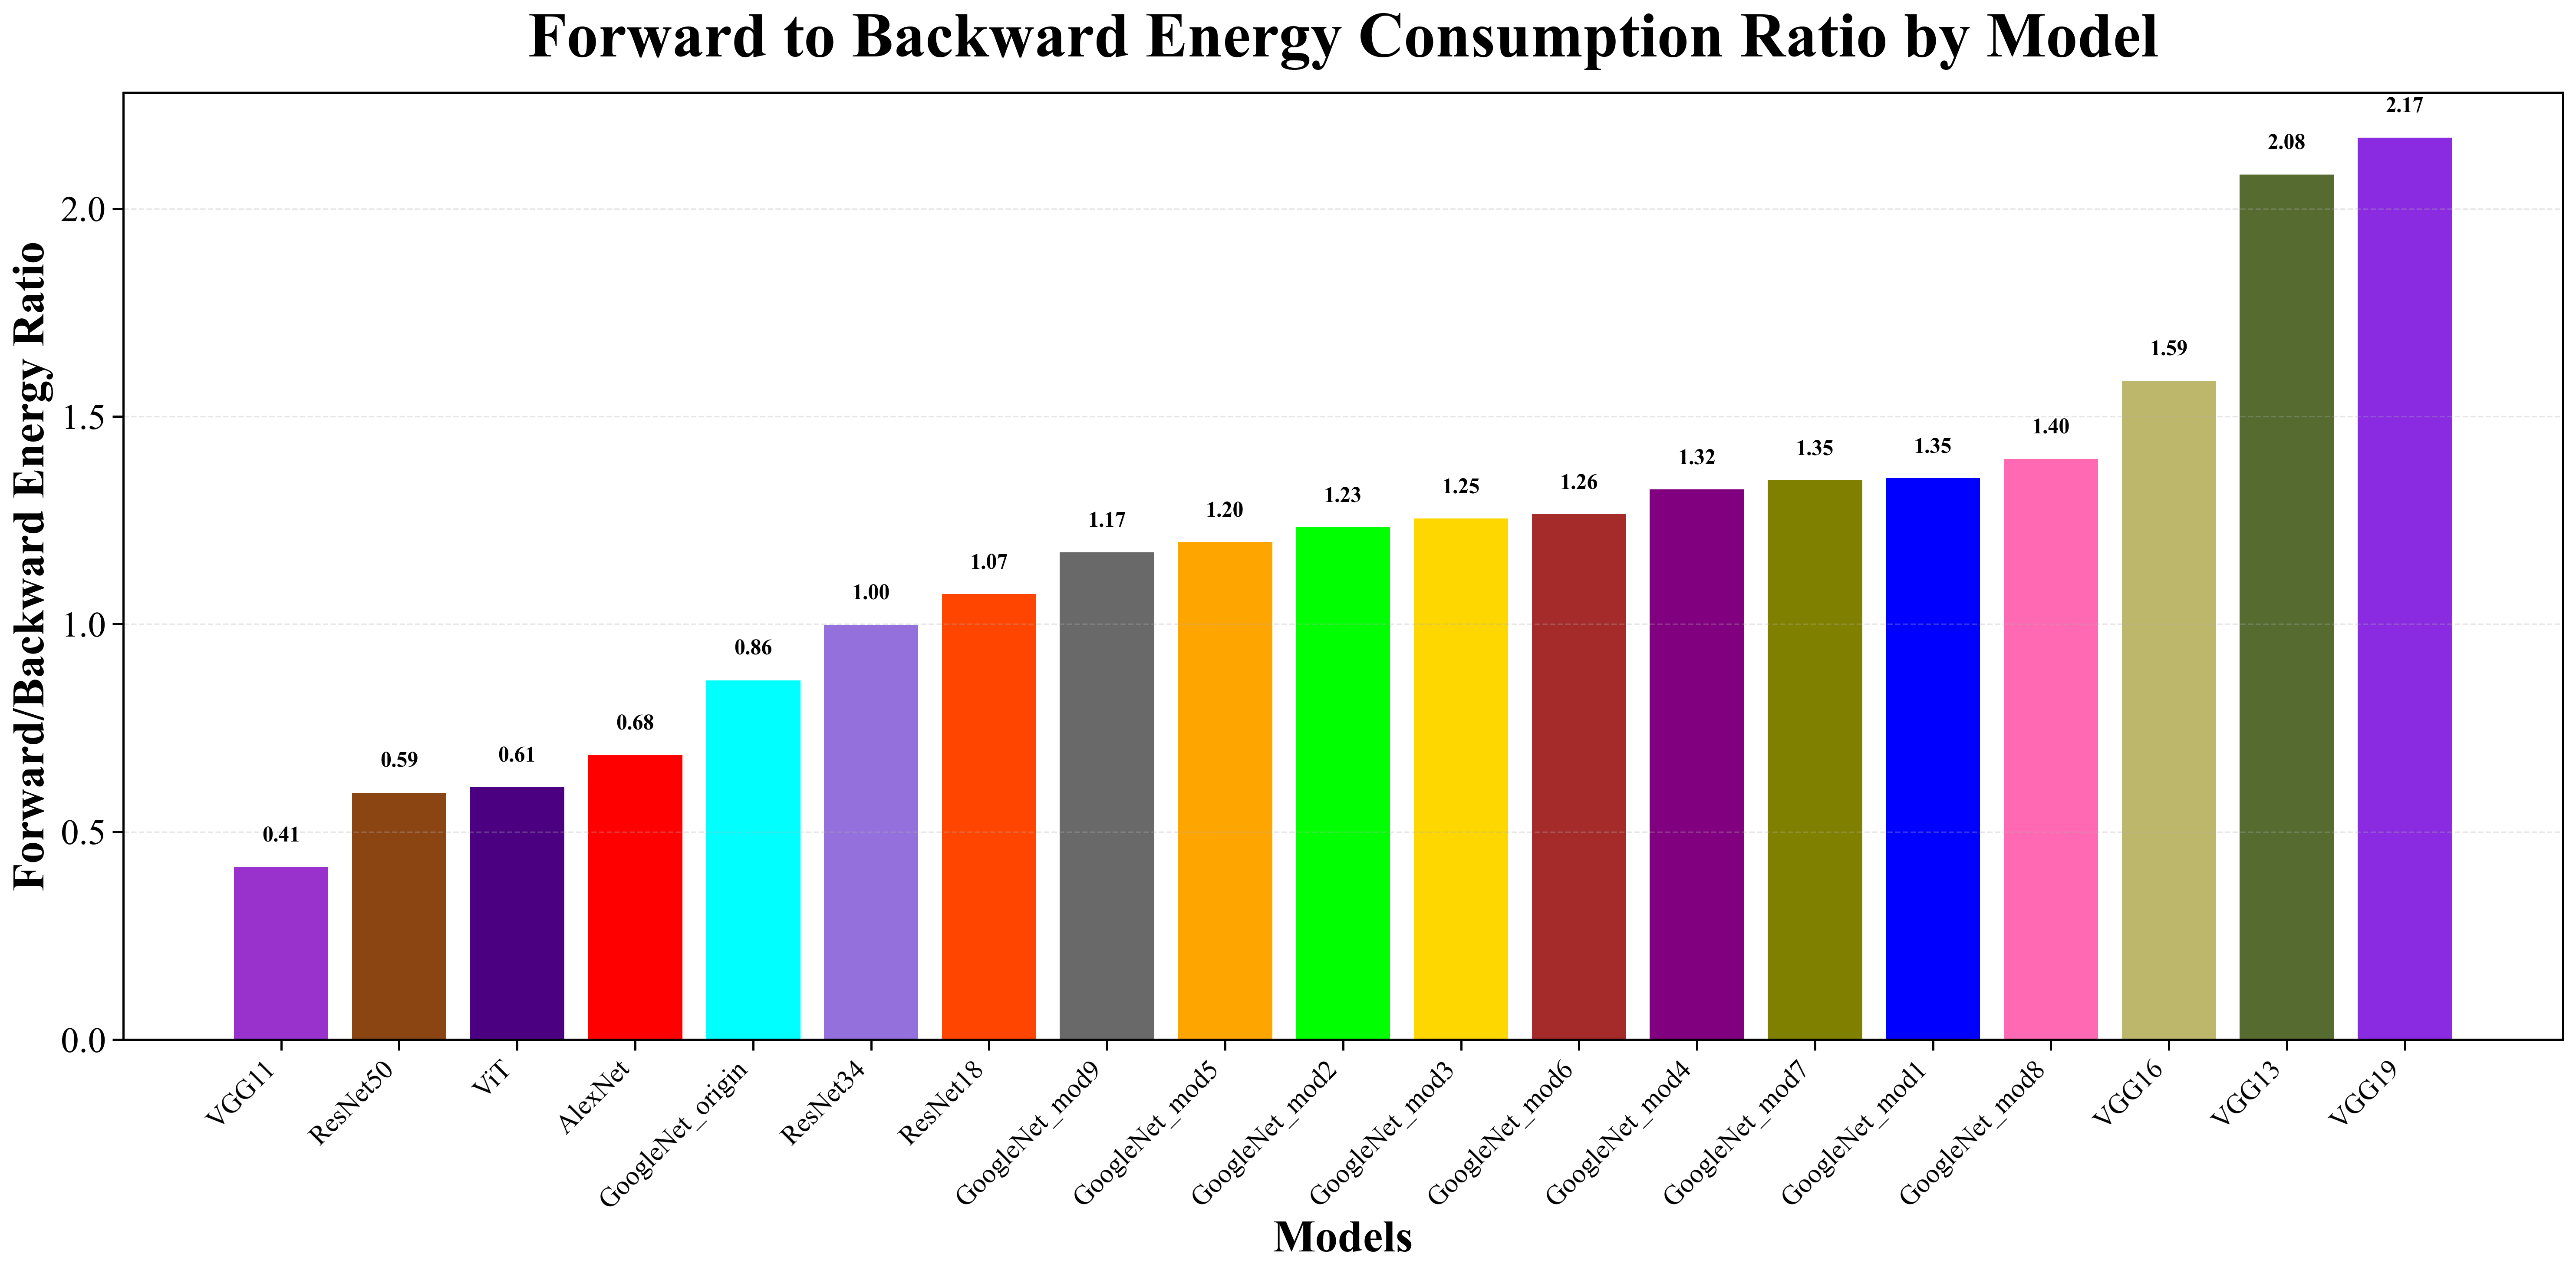

In [27]:
# Define colors for each model
model_colors = {
    'alexnet': '#FF0000',           # Red
    'googlenet_origin': '#00FFFF',  # Cyan
    'googlenet_mod1': '#0000FF',    # Blue
    'googlenet_mod2': '#00FF00',    # Green
    'googlenet_mod3': '#FFD700',    # Gold
    'googlenet_mod4': '#800080',    # Purple
    'googlenet_mod5': '#FFA500',    # Orange
    'googlenet_mod6': '#A52A2A',    # Brown
    'googlenet_mod7': '#808000',    # Olive
    'googlenet_mod8': '#FF69B4',    # Hot Pink
    'googlenet_mod9': '#696969',    # Dim Gray
    'resnet18': '#FF4500',          # Orange Red
    'resnet34': '#9370DB',          # Medium Purple
    'mobilenetv2': '#FF1493',       # Deep Pink
    'mobilenetv1': '#A9A9A9',       # Dark Gray
    'resnet50': '#8B4513',          # Saddle Brown
    'vgg13': '#556B2F',             # Dark Olive Green
    'vgg16': '#BDB76B',             # Dark Khaki
    'vit': '#4B0082',              # Indigo
    'vgg19': '#8A2BE2',            # Blue Violet
    'vgg11': '#9932CC'             # Dark Orchid
}
plt.figure(figsize=(20, 15), dpi=300)  # Added high DPI setting
x_axis = ['to_device', 'forward', 'loss', 'backward', 'optimize']

# Calculate forward/backward energy ratio for each model
forward_backward_ratio = {}
for model, energy_data in energy_data_models.items():
    energy_batch_mean = energy_data[0]
    # Get forward and backward energy values (index 1 for forward, 3 for backward)
    forward_energy = energy_batch_mean[1]  # forward step
    backward_energy = energy_batch_mean[3]  # backward step
    # Calculate ratio
    ratio = (backward_energy - forward_energy) / forward_energy if forward_energy != 0 else float('inf')
    forward_backward_ratio[model] = ratio

# Plot all models including VGG13 and VGG16
for model, energy_data in energy_data_models.items():
    energy_batch_mean = energy_data[0]
    energy_batch_std = energy_data[1]
    # Create display label with proper capitalization
    display_label = model
    display_label = display_label.replace('alexnet', 'AlexNet')
    display_label = display_label.replace('googlenet', 'GoogleNet') 
    display_label = display_label.replace('resnet', 'ResNet')
    display_label = display_label.replace('vgg', 'VGG')
    display_label = display_label.replace('vit', "ViT")
    
    # Add forward/backward ratio to the label
    ratio = forward_backward_ratio[model]
    display_label = f"{display_label} (F/B: {ratio:.2f})"
    
    line = plt.errorbar(x_axis, energy_batch_mean, yerr=energy_batch_std,
                label=display_label, marker='o', color=model_colors[model],
                capsize=3, capthick=1, markersize=6,
                linewidth=1.5)
    
    # Add text labels for each data point
    for i, (x, y) in enumerate(zip(x_axis, energy_batch_mean)):
        plt.text(x, y + energy_batch_std[i] + 0.5, f'{y:.2f}', 
                 ha='center', va='bottom', fontsize=8, 
                 color=model_colors[model], weight='bold')

plt.grid(True, linestyle='--', alpha=0.3)
plt.xlabel('Training Steps', fontsize=25, weight='bold')
plt.ylabel('Energy Consumption (J)', fontsize=25, weight='bold')
plt.title('Energy Consumption for Different Models across Training Steps', pad=20, fontsize=35, weight='bold')
plt.legend(loc='center', bbox_to_anchor=(0.5, -0.3),
          frameon=True, fancybox=True, shadow=True, 
          borderpad=1, labelspacing=1, ncol=4, prop={'family': 'serif', 'size': 15})
plt.xticks(rotation=45)
plt.tight_layout()
# save the plot to pdf file
plt.savefig(os.path.join(plot_folder, 'energy_consumption_of_all_models.pdf'))
plt.show()

# Create a separate bar chart for forward/backward ratios
plt.figure(figsize=(20, 10), dpi=300)
models = list(forward_backward_ratio.keys())
ratios = list(forward_backward_ratio.values())

# Sort models by ratio for better visualization
sorted_indices = np.argsort(ratios)
sorted_models = [models[i] for i in sorted_indices]
sorted_ratios = [ratios[i] for i in sorted_indices]
sorted_colors = [model_colors[model] for model in sorted_models]

# Create display labels with proper capitalization
display_labels = []
for model in sorted_models:
    display_label = model
    display_label = display_label.replace('alexnet', 'AlexNet')
    display_label = display_label.replace('googlenet', 'GoogleNet') 
    display_label = display_label.replace('resnet', 'ResNet')
    display_label = display_label.replace('vgg', 'VGG')
    display_label = display_label.replace('vit', "ViT")
    display_labels.append(display_label)

bars = plt.bar(display_labels, sorted_ratios, color=sorted_colors)

# Add value labels on top of each bar
for bar, ratio in zip(bars, sorted_ratios):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.05,
             f'{ratio:.2f}', ha='center', va='bottom', fontsize=12, weight='bold')

plt.grid(True, linestyle='--', alpha=0.3, axis='y')
plt.xlabel('Models', fontsize=25, weight='bold')
plt.ylabel('Forward/Backward Energy Ratio', fontsize=25, weight='bold')
plt.title('Forward to Backward Energy Consumption Ratio by Model', pad=20, fontsize=35, weight='bold')
plt.xticks(rotation=45, ha='right', fontsize=15)
plt.tight_layout()
plt.savefig(os.path.join(plot_folder, 'forward_backward_energy_ratio.pdf'))
plt.show()

Minimum backward energy value: 1996.1721 J
Maximum backward energy value: 75581.7470 J


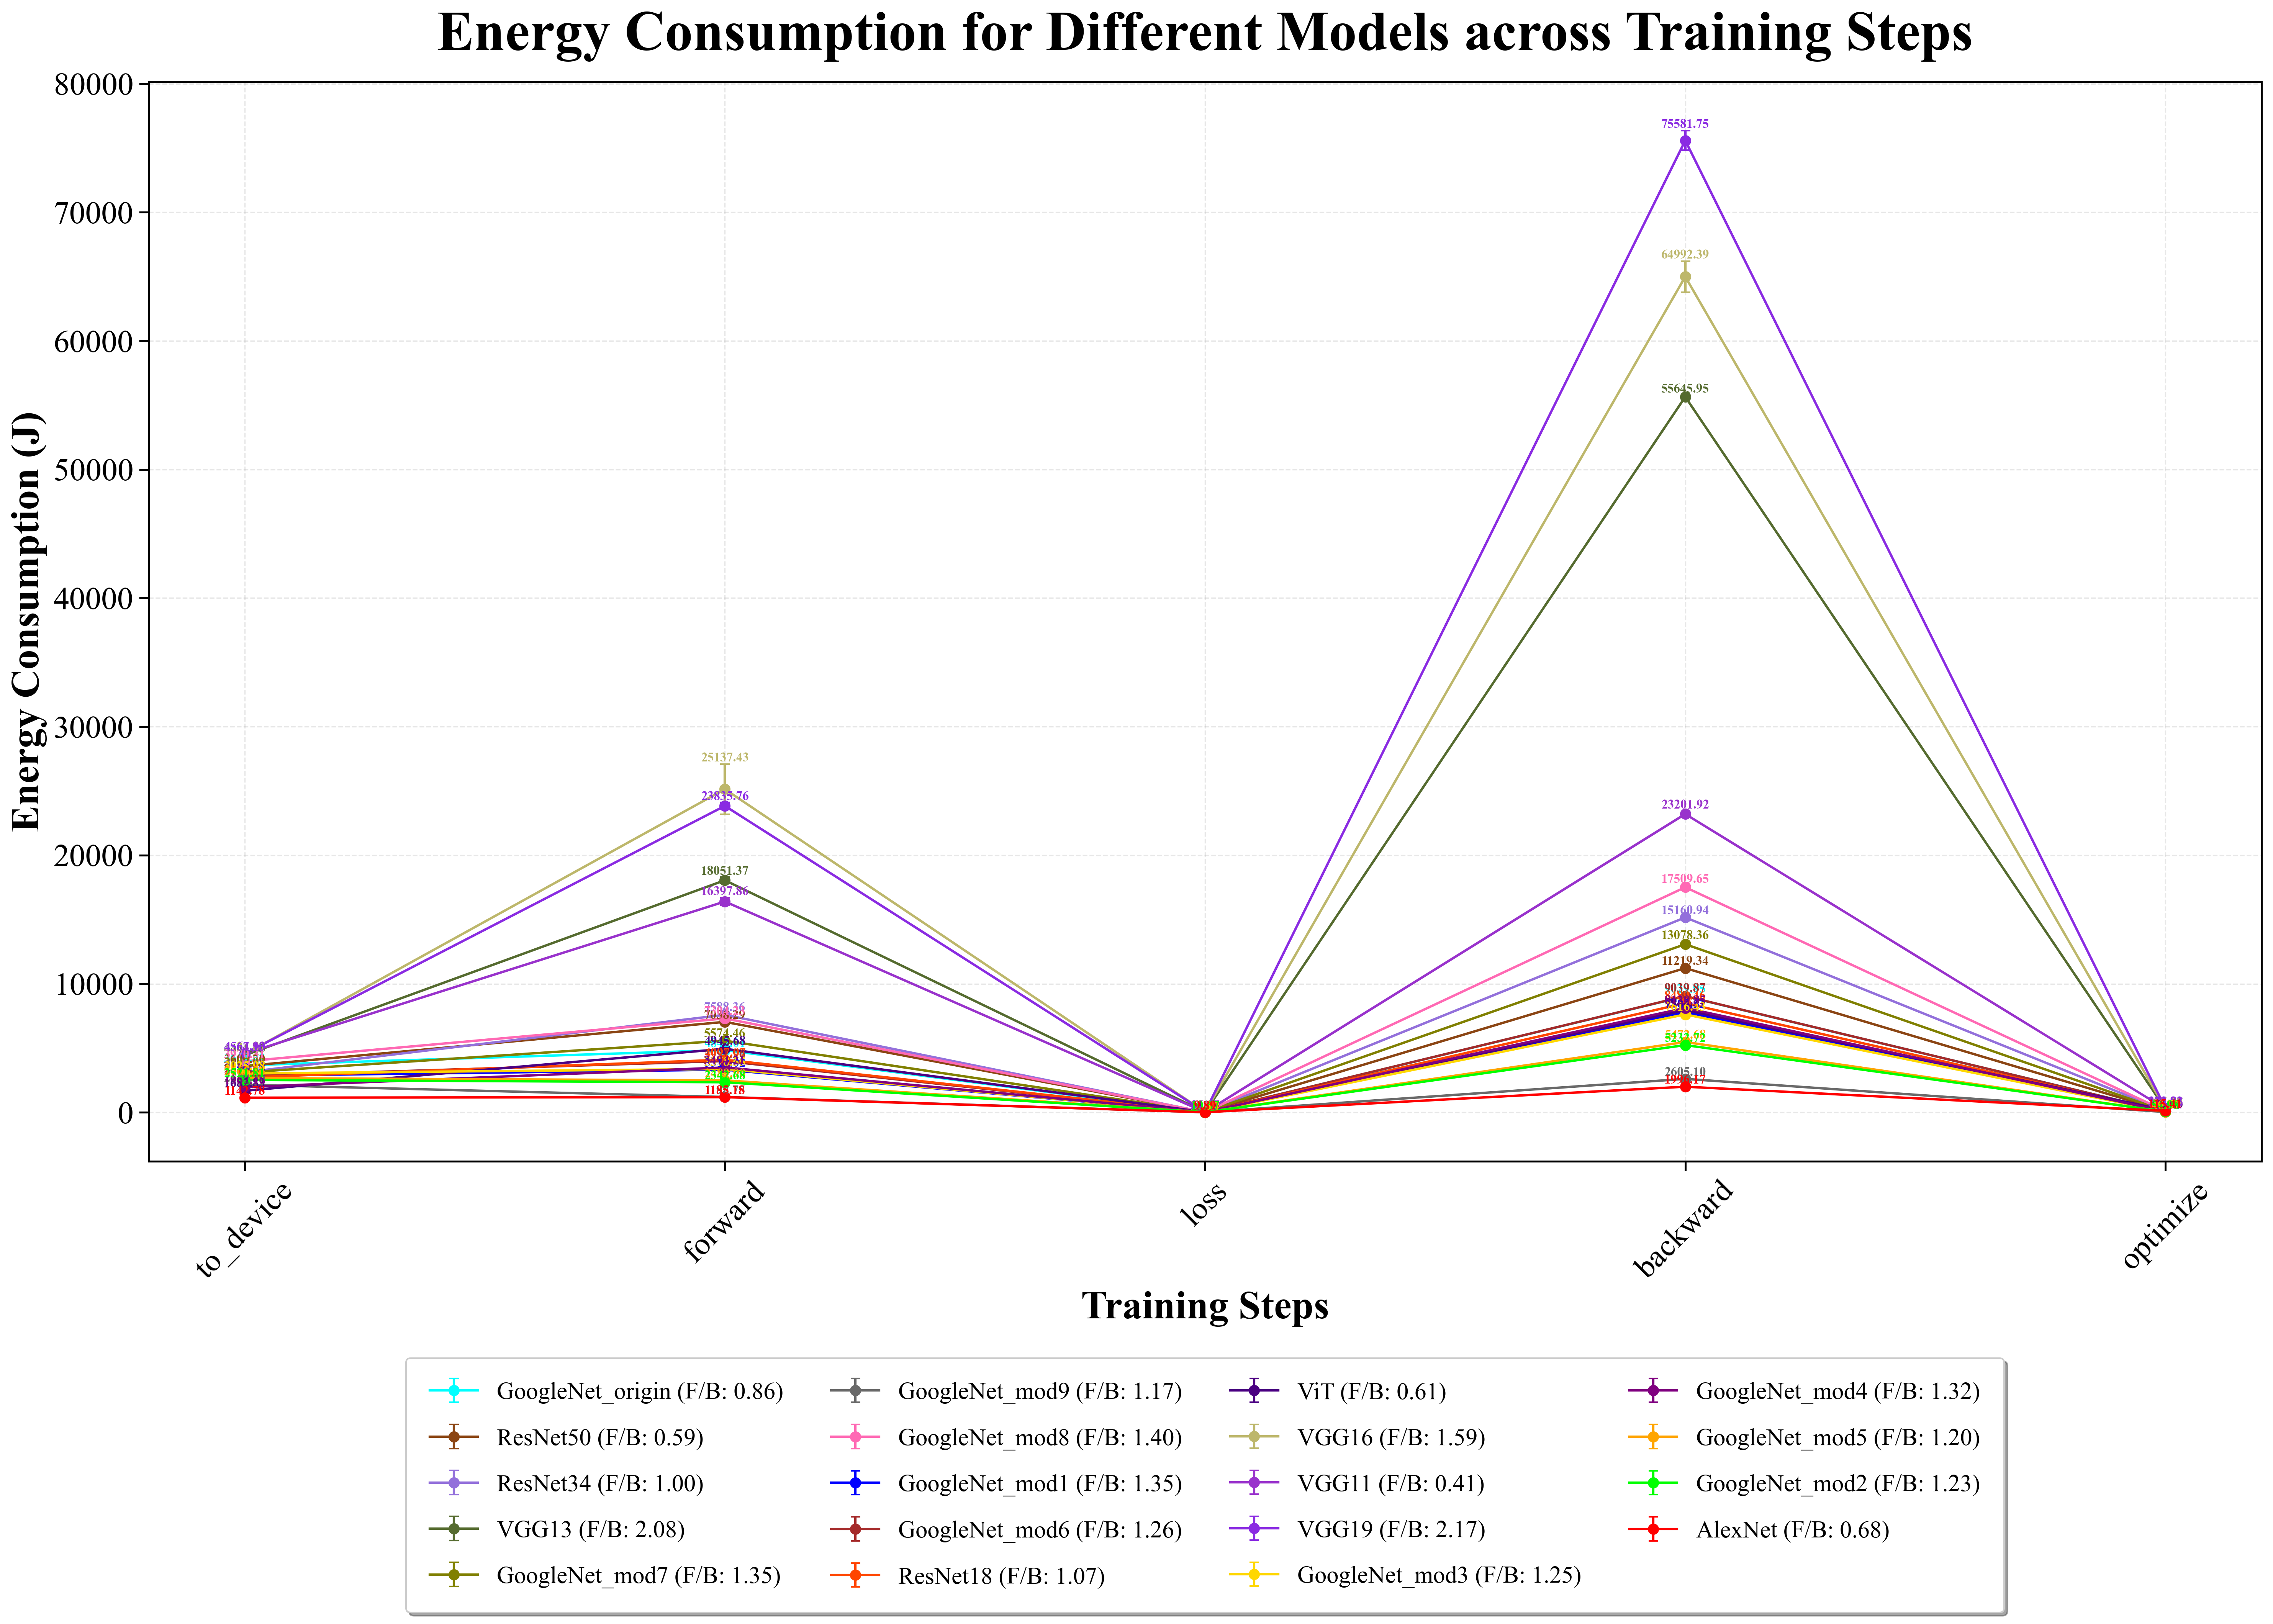

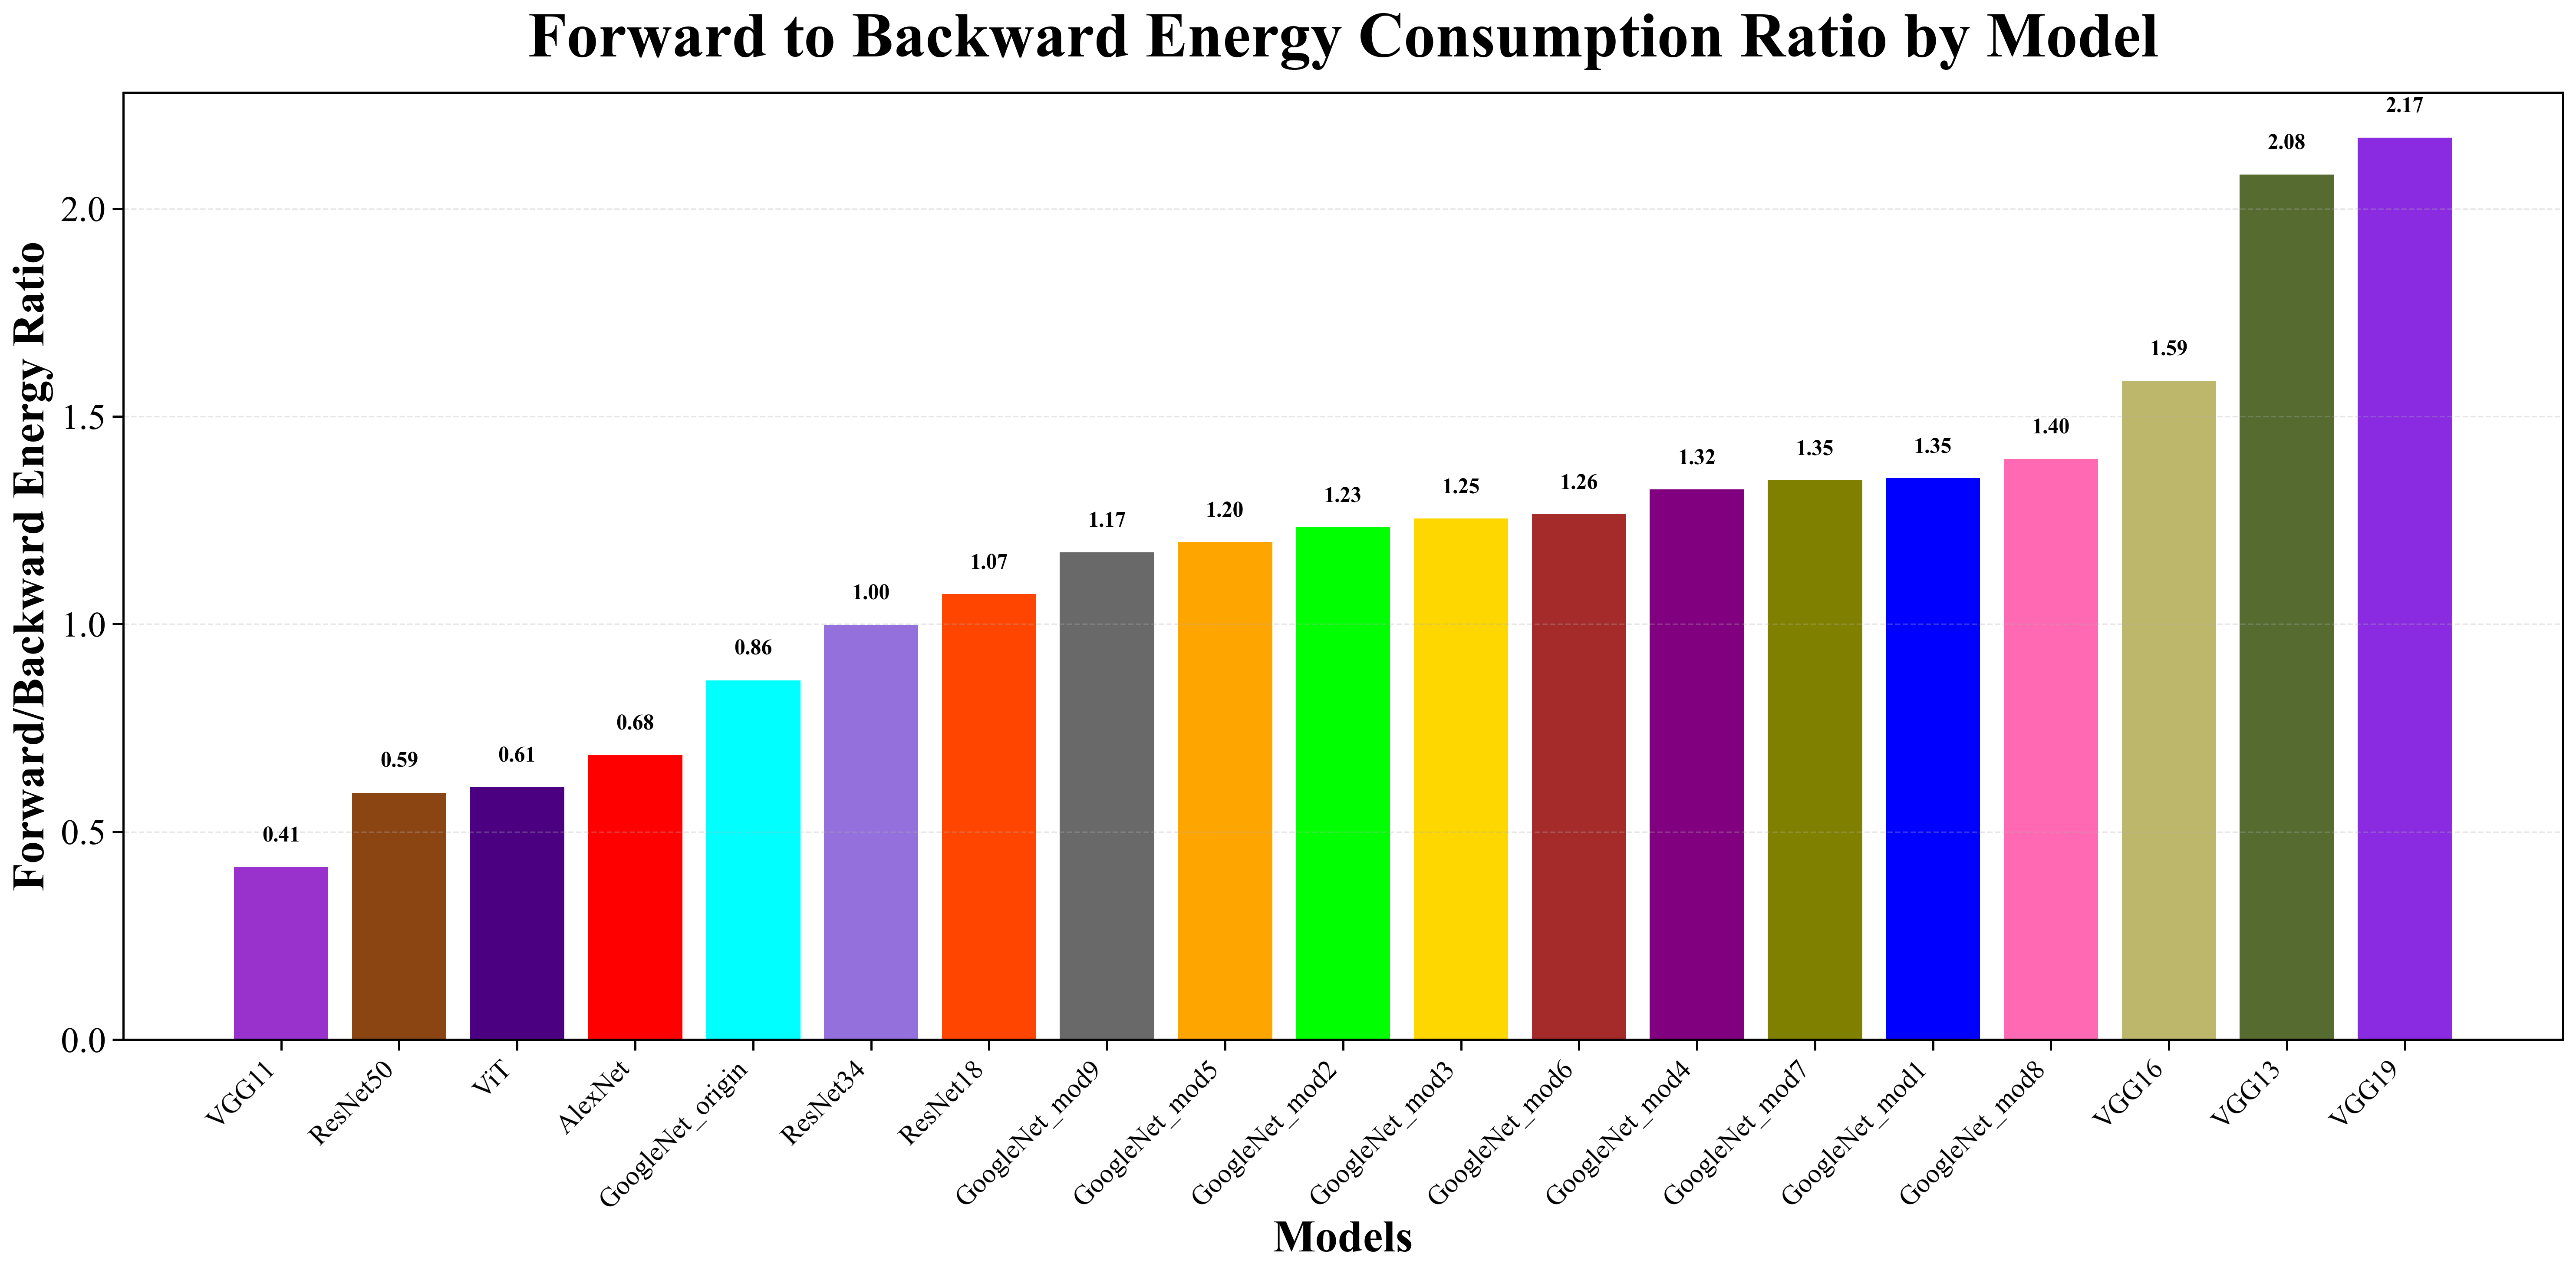

In [28]:
# Define colors for each model
model_colors = {
    'alexnet': '#FF0000',           # Red
    'googlenet_origin': '#00FFFF',  # Cyan
    'googlenet_mod1': '#0000FF',    # Blue
    'googlenet_mod2': '#00FF00',    # Green
    'googlenet_mod3': '#FFD700',    # Gold
    'googlenet_mod4': '#800080',    # Purple
    'googlenet_mod5': '#FFA500',    # Orange
    'googlenet_mod6': '#A52A2A',    # Brown
    'googlenet_mod7': '#808000',    # Olive
    'googlenet_mod8': '#FF69B4',    # Hot Pink
    'googlenet_mod9': '#696969',    # Dim Gray
    'resnet18': '#FF4500',          # Orange Red
    'resnet34': '#9370DB',          # Medium Purple
    'mobilenetv2': '#FF1493',       # Deep Pink
    'mobilenetv1': '#A9A9A9',       # Dark Gray
    'resnet50': '#8B4513',          # Saddle Brown
    'vgg13': '#556B2F',             # Dark Olive Green
    'vgg16': '#BDB76B',             # Dark Khaki
    'vit': '#4B0082',              # Indigo
    'vgg19': '#8A2BE2',            # Blue Violet
    'vgg11': '#9932CC'             # Dark Orchid
}
plt.figure(figsize=(20, 15), dpi=300)  # Added high DPI setting
rcParams['pdf.fonttype'] = 42
rcParams['ps.fonttype'] = 42
x_axis = ['to_device', 'forward', 'loss', 'backward', 'optimize']

# Calculate forward/backward energy ratio for each model
forward_backward_ratio = {}
backward_values = []  # Collect all backward energy values

for model, energy_data in energy_data_models.items():
    energy_batch_mean = energy_data[0]
    # Get forward and backward energy values (index 1 for forward, 3 for backward)
    forward_energy = energy_batch_mean[1]  # forward step
    backward_energy = energy_batch_mean[3]  # backward step
    backward_values.append(backward_energy)  # Collect backward values
    # Calculate ratio
    ratio = (backward_energy - forward_energy) / forward_energy if forward_energy != 0 else float('inf')
    forward_backward_ratio[model] = ratio

# Print minimum and maximum values in the backward step
print(f"Minimum backward energy value: {min(backward_values):.4f} J")
print(f"Maximum backward energy value: {max(backward_values):.4f} J")

# Plot all models including VGG13 and VGG16
for model, energy_data in energy_data_models.items():
    energy_batch_mean = energy_data[0]
    energy_batch_std = energy_data[1]
    # Create display label with proper capitalization
    display_label = model
    display_label = display_label.replace('alexnet', 'AlexNet')
    display_label = display_label.replace('googlenet', 'GoogleNet') 
    display_label = display_label.replace('resnet', 'ResNet')
    display_label = display_label.replace('vgg', 'VGG')
    display_label = display_label.replace('vit', "ViT")
    
    # Add forward/backward ratio to the label
    ratio = forward_backward_ratio[model]
    display_label = f"{display_label} (F/B: {ratio:.2f})"
    
    line = plt.errorbar(x_axis, energy_batch_mean, yerr=energy_batch_std,
                label=display_label, marker='o', color=model_colors[model],
                capsize=3, capthick=1, markersize=6,
                linewidth=1.5)
    
    # Add text labels for each data point
    for i, (x, y) in enumerate(zip(x_axis, energy_batch_mean)):
        plt.text(x, y + energy_batch_std[i] + 0.5, f'{y:.2f}', 
                 ha='center', va='bottom', fontsize=8, 
                 color=model_colors[model], weight='bold')

plt.grid(True, linestyle='--', alpha=0.3)
plt.xlabel('Training Steps', fontsize=25, weight='bold')
plt.ylabel('Energy Consumption (J)', fontsize=25, weight='bold')
plt.title('Energy Consumption for Different Models across Training Steps', pad=20, fontsize=35, weight='bold')
plt.legend(loc='center', bbox_to_anchor=(0.5, -0.3),
          frameon=True, fancybox=True, shadow=True, 
          borderpad=1, labelspacing=1, ncol=4, prop={'family': 'serif', 'size': 15})
plt.xticks(rotation=45)
plt.tight_layout()
# save the plot to pdf file
plt.savefig(os.path.join(plot_folder, 'energy_consumption_of_all_models.pdf'))
plt.show()

# Create a separate bar chart for forward/backward ratios
plt.figure(figsize=(20, 10), dpi=300)
models = list(forward_backward_ratio.keys())
ratios = list(forward_backward_ratio.values())

# Sort models by ratio for better visualization
sorted_indices = np.argsort(ratios)
sorted_models = [models[i] for i in sorted_indices]
sorted_ratios = [ratios[i] for i in sorted_indices]
sorted_colors = [model_colors[model] for model in sorted_models]

# Create display labels with proper capitalization
display_labels = []
for model in sorted_models:
    display_label = model
    display_label = display_label.replace('alexnet', 'AlexNet')
    display_label = display_label.replace('googlenet', 'GoogleNet') 
    display_label = display_label.replace('resnet', 'ResNet')
    display_label = display_label.replace('vgg', 'VGG')
    display_label = display_label.replace('vit', "ViT")
    display_labels.append(display_label)

bars = plt.bar(display_labels, sorted_ratios, color=sorted_colors)

# Add value labels on top of each bar
for bar, ratio in zip(bars, sorted_ratios):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.05,
             f'{ratio:.2f}', ha='center', va='bottom', fontsize=12, weight='bold')

plt.grid(True, linestyle='--', alpha=0.3, axis='y')
plt.xlabel('Models', fontsize=25, weight='bold')
plt.ylabel('Forward/Backward Energy Ratio', fontsize=25, weight='bold')
plt.title('Forward to Backward Energy Consumption Ratio by Model', pad=20, fontsize=35, weight='bold')
plt.xticks(rotation=45, ha='right', fontsize=15)
plt.tight_layout()
plt.savefig(os.path.join(plot_folder, 'forward_backward_energy_ratio.pdf'))
plt.show()

## analysis the sample loss rate 

In [29]:
missing_rate_list = []
model_list = []
for model_data_path in model_data_folder_list:
    # print out the current model name
    model_name = model_data_path.split('/')[-3]
    print(model_name)
    # if the model name is .DS_Store, skip it
    if model_name == '.DS_Store':
        continue
    else:
        model_list.append(model_name)


        # find out the files in the model_data_path
        files = os.listdir(model_data_path)
        # if files is .DS_Store, remove it
        if '.DS_Store' in files:
            files.remove('.DS_Store')
        # print(files)

        # load the data
        labeled_energy_data = pd.read_csv(os.path.join(model_data_path, 'labeled_energy_data.csv'))



        # Calculate the total energy consumption for all the labeled_energy_data
        # count the number of rows in the labeled_energy_data, which is the number of samples
        number_of_samples = labeled_energy_data.shape[0]
        print('Number of samples:', number_of_samples)

        # get the start and end time of the labeled_energy_data
        start_time = labeled_energy_data['timestamp'].iloc[0]
        end_time = labeled_energy_data['timestamp'].iloc[-1]
        print('Start time:', start_time)
        print('End time:', end_time)

        # Calculate the theorectical number of samples based on the sampling rate
        sample_rate = 0.002 # 2ms
        theoretical_number_of_samples = np.round((end_time - start_time) / sample_rate)
        print('Theoretical number of samples:', theoretical_number_of_samples)

        # calculate the missing rate
        missing_rate = 1 - number_of_samples / theoretical_number_of_samples
        print('Missing rate:', missing_rate)

        print('-'*50)

        missing_rate_list.append(missing_rate)

googlenet_origin
Number of samples: 157499
Start time: 1736653179.0042045
End time: 1736653647.4089808
Theoretical number of samples: 234202.0
Missing rate: 0.3275078778148778
--------------------------------------------------
resnet50
Number of samples: 208876
Start time: 1736652545.5229914
End time: 1736653159.0128667
Theoretical number of samples: 306745.0
Missing rate: 0.3190565453389623
--------------------------------------------------
resnet34
Number of samples: 197381
Start time: 1736651939.682009
End time: 1736652526.6450503
Theoretical number of samples: 293482.0
Missing rate: 0.32745108728985084
--------------------------------------------------
mobilenetv2
Number of samples: 211794
Start time: 1736657508.0603485
End time: 1736658146.657621
Theoretical number of samples: 319299.0
Missing rate: 0.33669068803848434
--------------------------------------------------
vgg13
Number of samples: 412981
Start time: 1736647812.2374449
End time: 1736649485.9317496
Theoretical number of

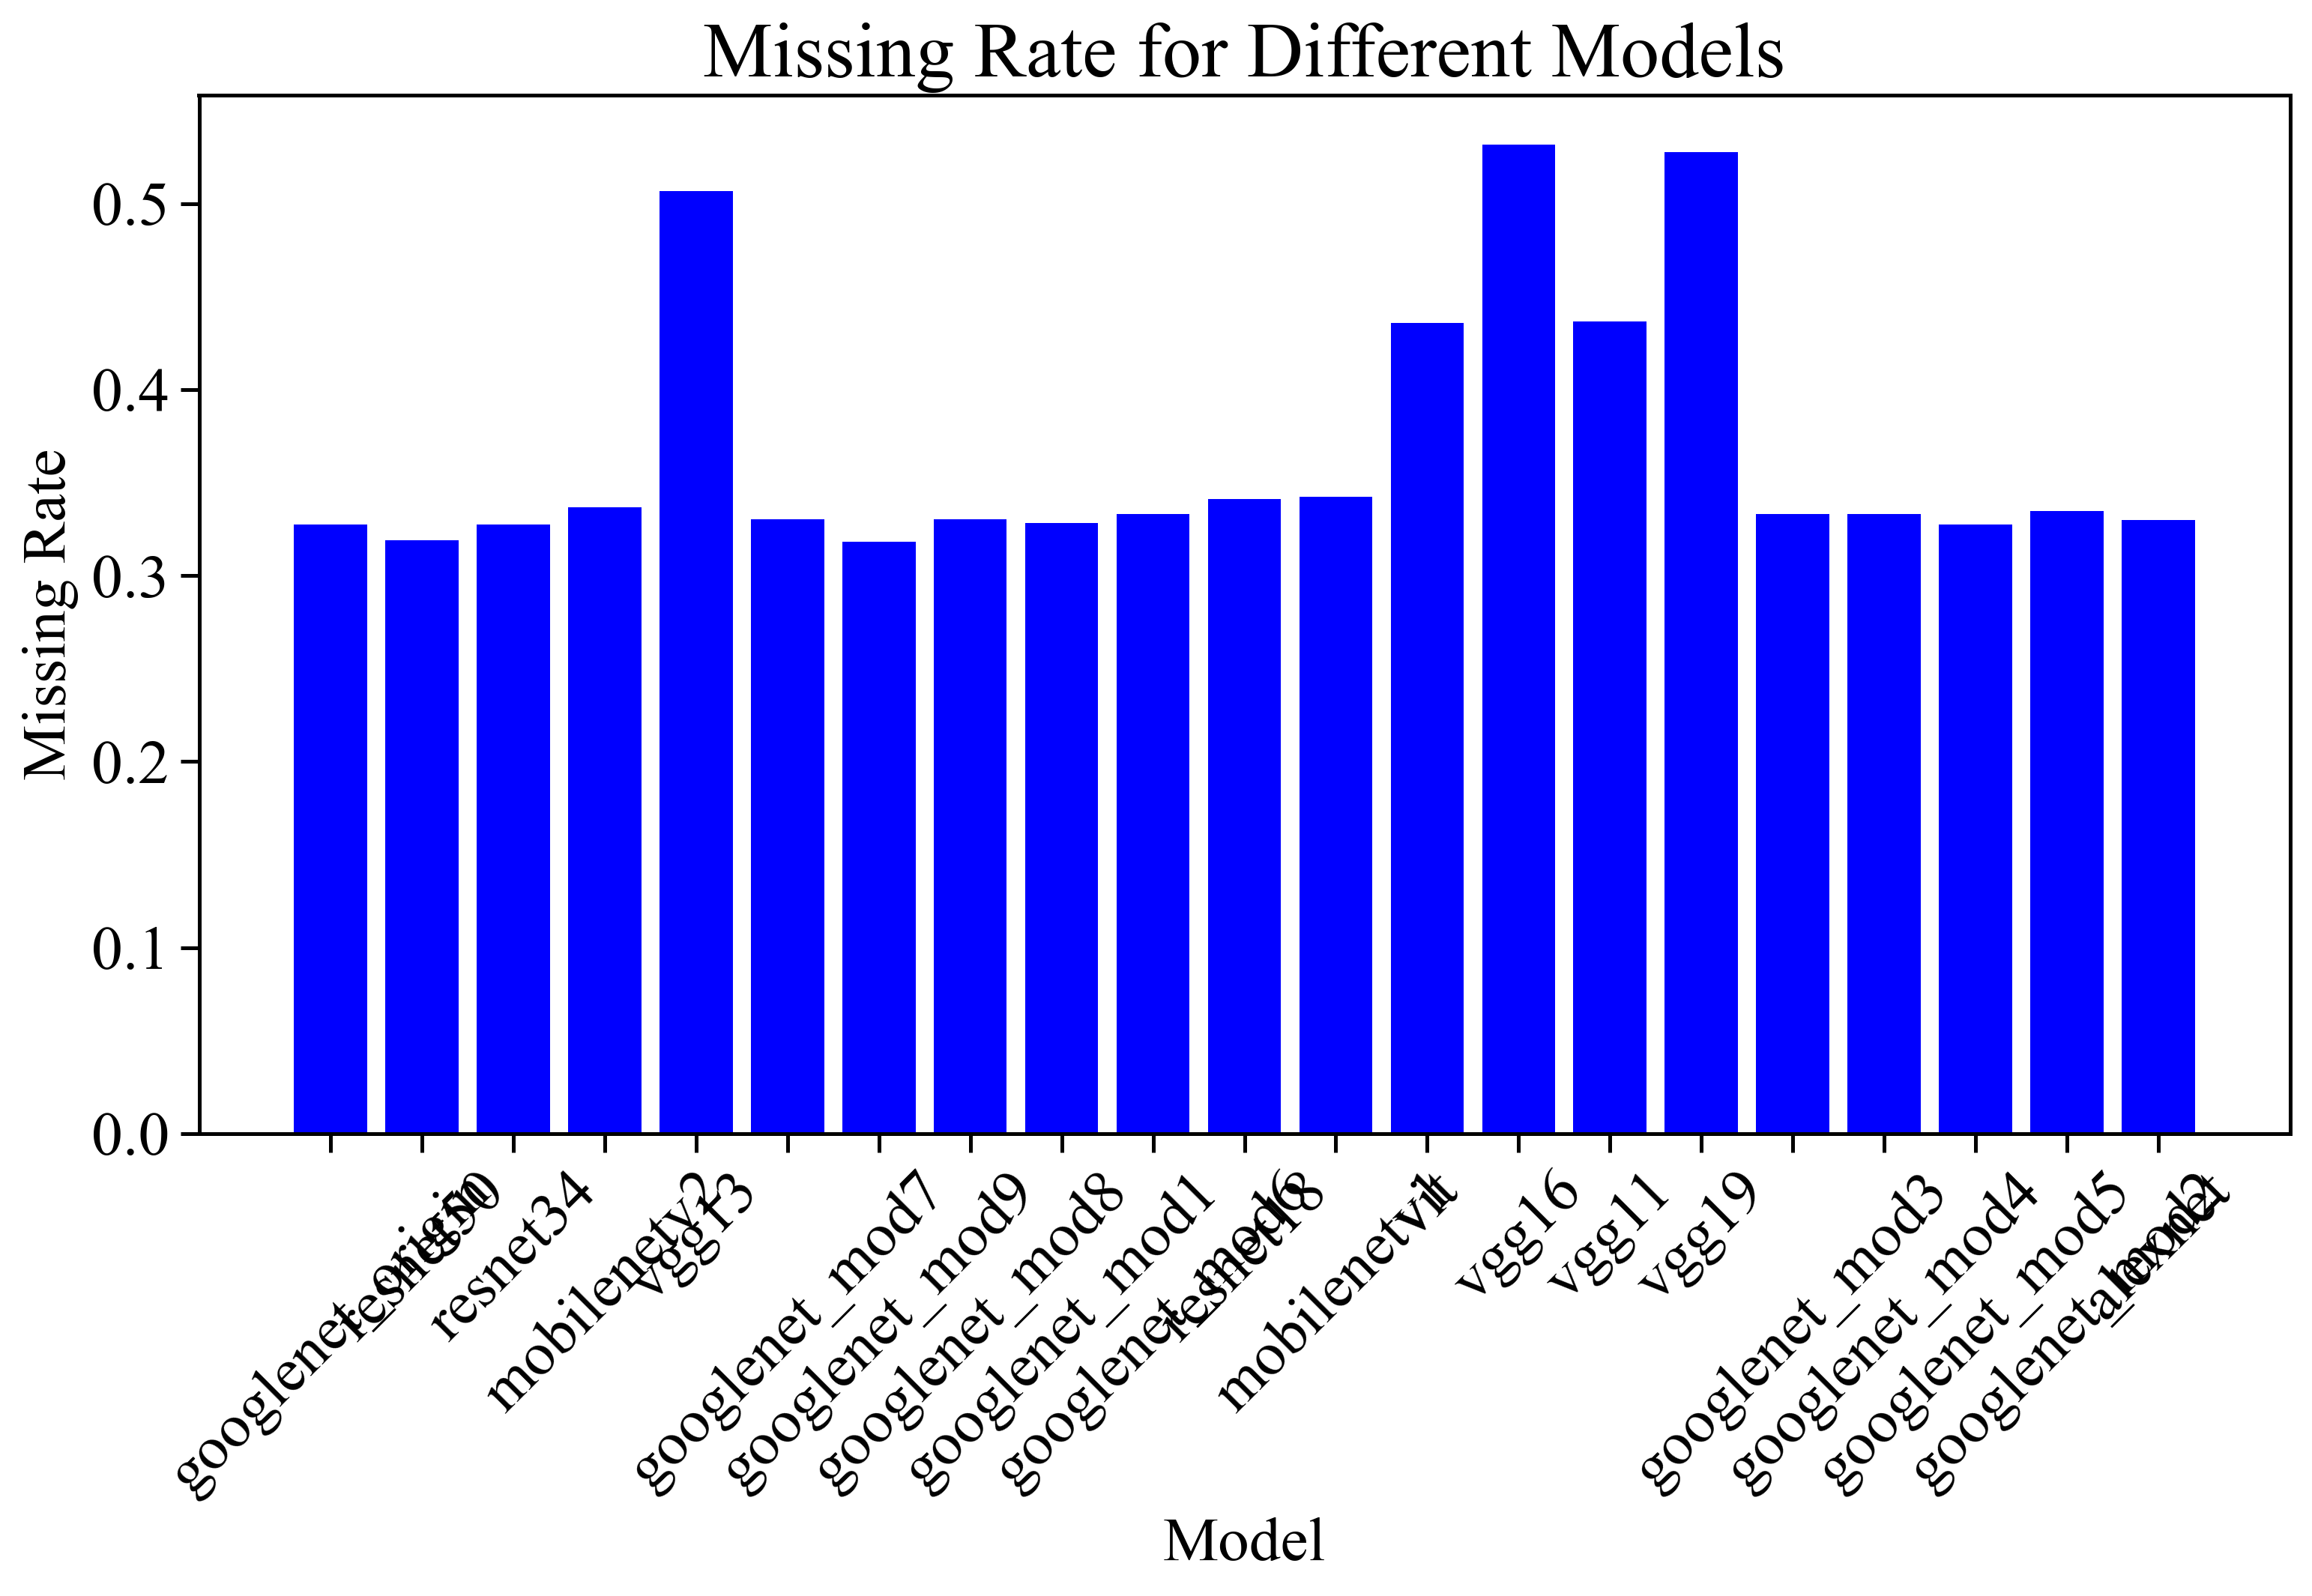

In [30]:
# plot the missing rate for all the models
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(model_list, missing_rate_list, color='blue')
ax.set_xlabel('Model')
ax.set_ylabel('Missing Rate')
ax.set_title('Missing Rate for Different Models')
plt.xticks(rotation=45)
plt.show()
